---
title: Visualize feature importances
author: "Nguyễn Ngọc Bình"
---

## Define function plot feature importance

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_feature_importance(importances, names):
    plt.style.use('fivethirtyeight')
    
    feat_names = np.array(names)
    indices = np.argsort(importances)[::-1]
    
    fig = plt.figure(figsize=(12, 8))
    plt.title("Feature importances")
    plt.bar(range(len(indices)), importances[indices], color='lightblue', align="center")
    plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
    plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical', fontsize=14)
    plt.xlim([-1, len(indices)])
    plt.show()


## Get example data (german credit)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the German Credit Data
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
column_names = ['existing_checking', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings',
                'employment', 'installment_rate', 'personal_status', 'other_debtors', 'residence_since',
                'property', 'age', 'other_installment_plans', 'housing', 'existing_credits', 'job', 'people_liable',
                'telephone', 'foreign_worker', 'class']
data = pd.read_csv(data_url, delimiter=' ', names=column_names)

# Preprocess the data
X = data.drop('class', axis=1)
y = data['class']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train[y_train == 2] = 0
y_test[y_test == 2] = 0

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   existing_checking        1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   credit_amount            1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment               1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   personal_status          1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  residence_since          1000 non-null   int64 
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [4]:
from sklearn.preprocessing import StandardScaler
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Visualize feature importances using a Lasso regression

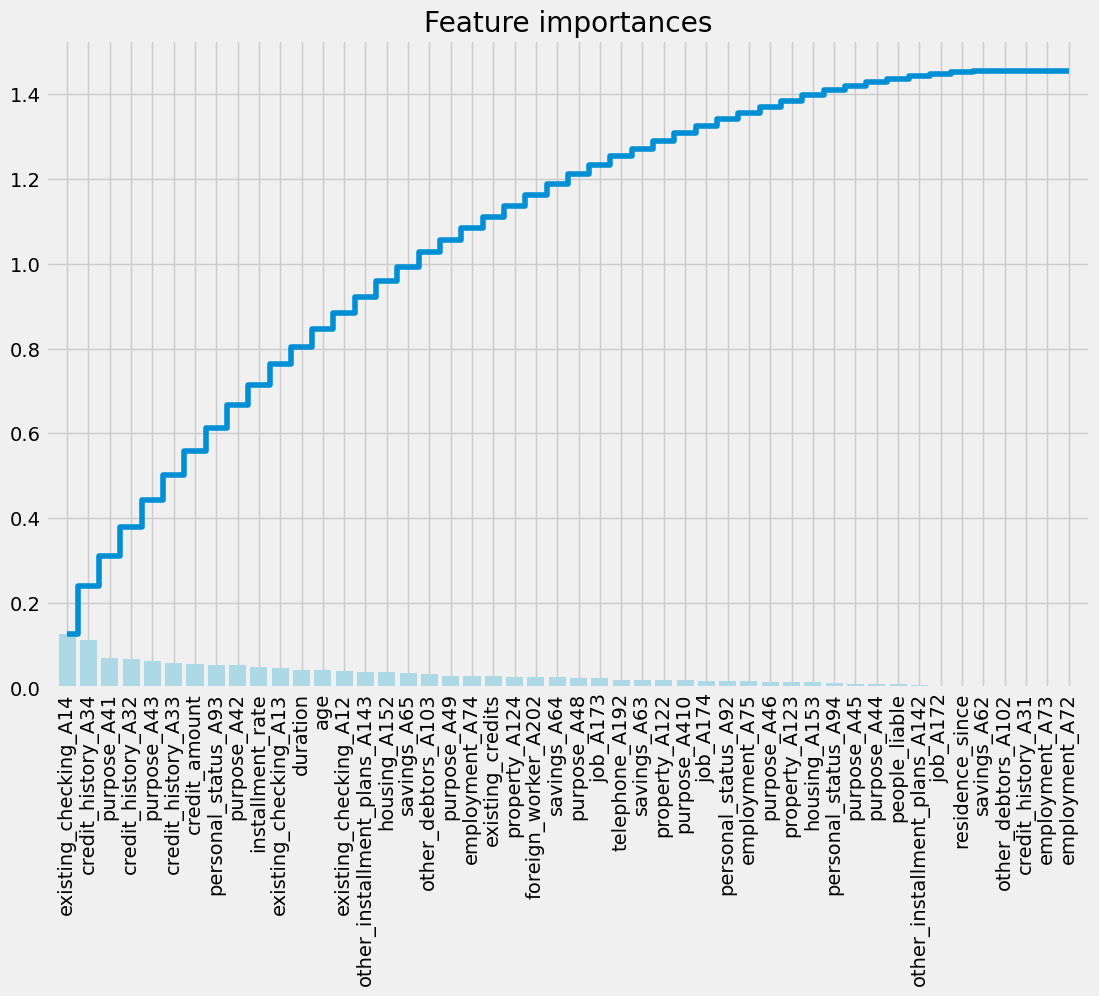

In [25]:
from sklearn.linear_model import LassoCV
# Use LassoCV for feature selection
model_lasso = LassoCV(alphas=[0.1, 1, 0.001, 0.0005]).fit(X_train_scaled, y_train)

# Visualize feature importances using the function
plot_feature_importance(np.abs(model_lasso.coef_), X_train.columns)

## Visualize feature importances using a Random Forest classifier

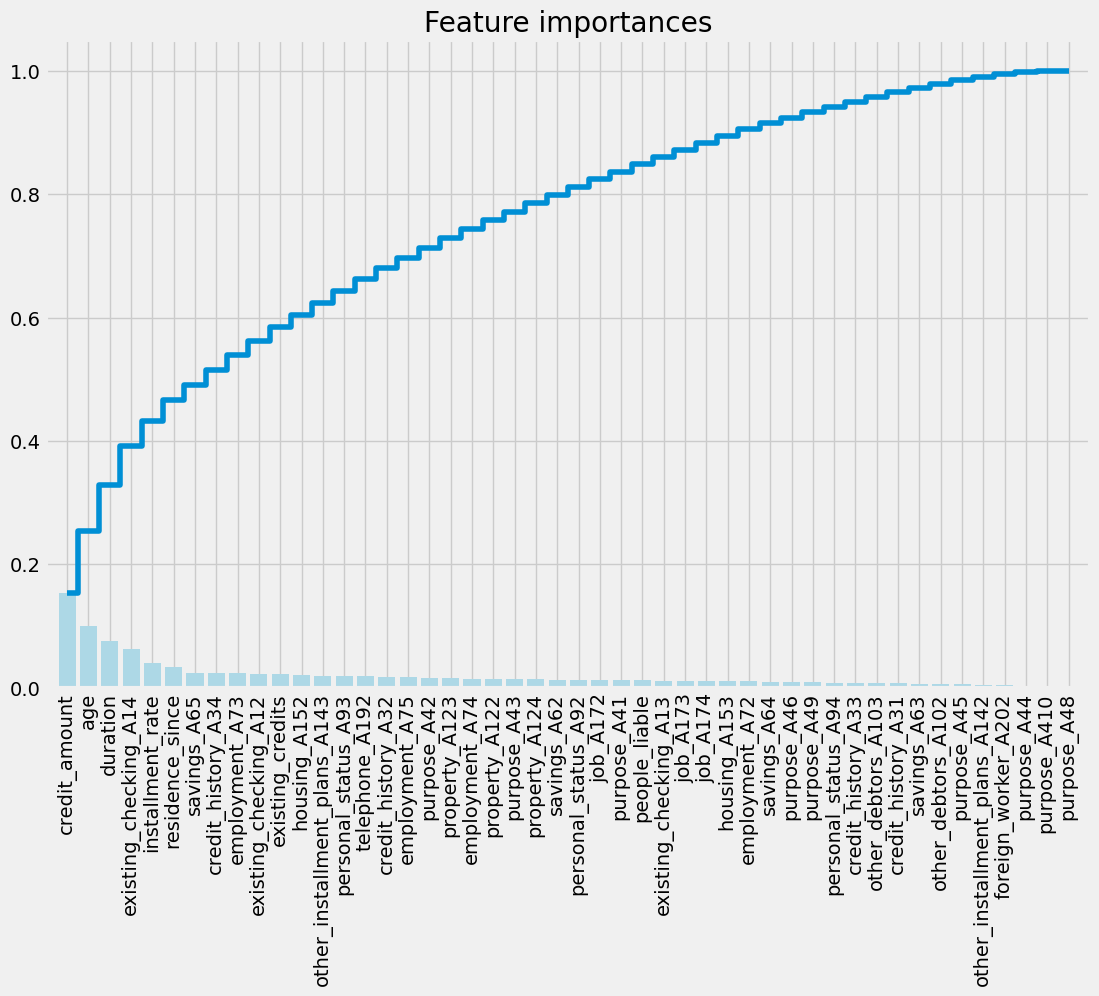

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Use RandomForestClassifier for feature importance
clf = RandomForestClassifier(n_estimators=10, random_state=123)
clf.fit(X_train_scaled, y_train)

names = X_train.columns
importances = clf.feature_importances_

# Call the plotting function
plot_feature_importance(importances, names)

## Visualize feature importances using a LightGBM classifier

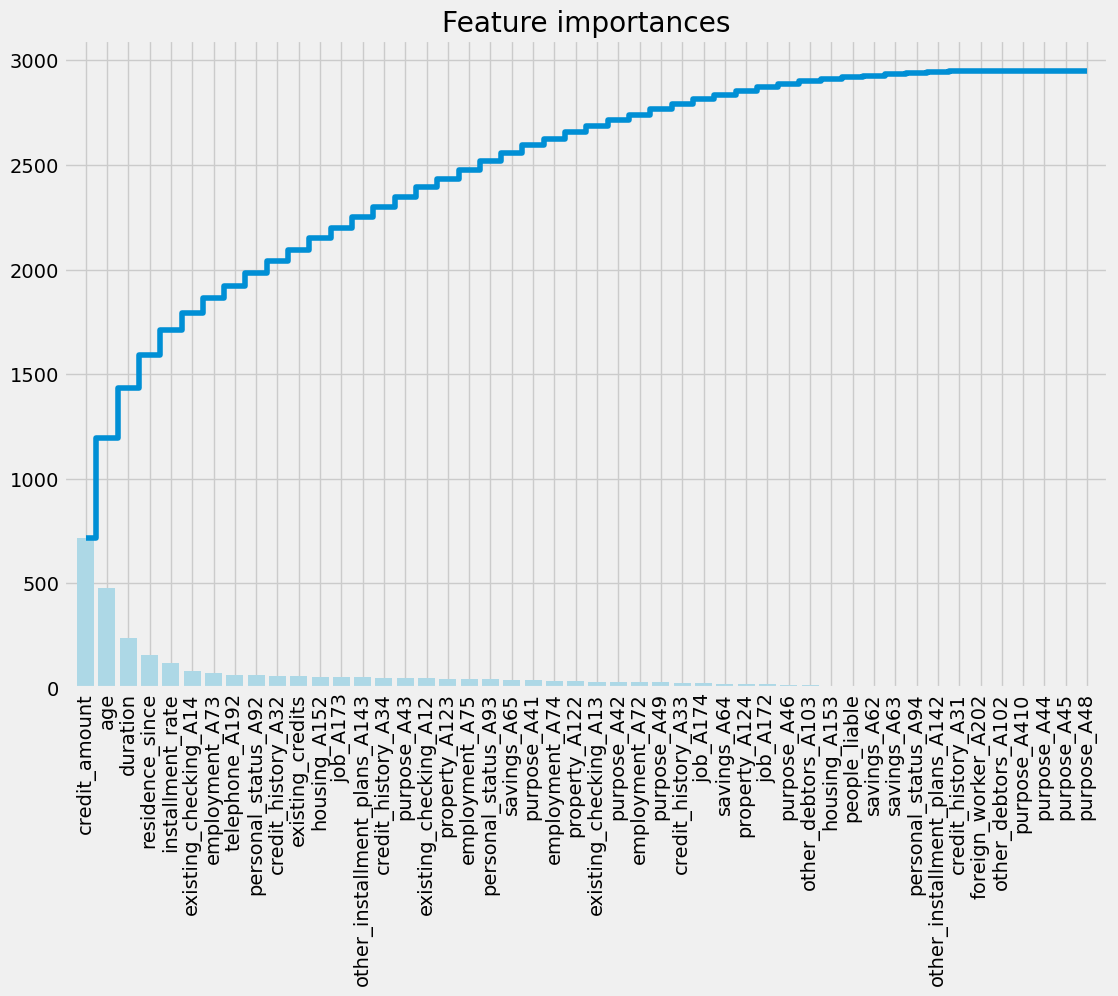

In [27]:
import lightgbm as lgb

# Use LightGBM classifier
clf = lgb.LGBMClassifier(n_estimators=100, random_state=123)
clf.fit(X_train_scaled, y_train)

# Get feature importances
importances = clf.feature_importances_
names = X_train.columns

# Call the plotting function
plot_feature_importance(importances, names)

## Visualize feature importances using a XGBoost classifier

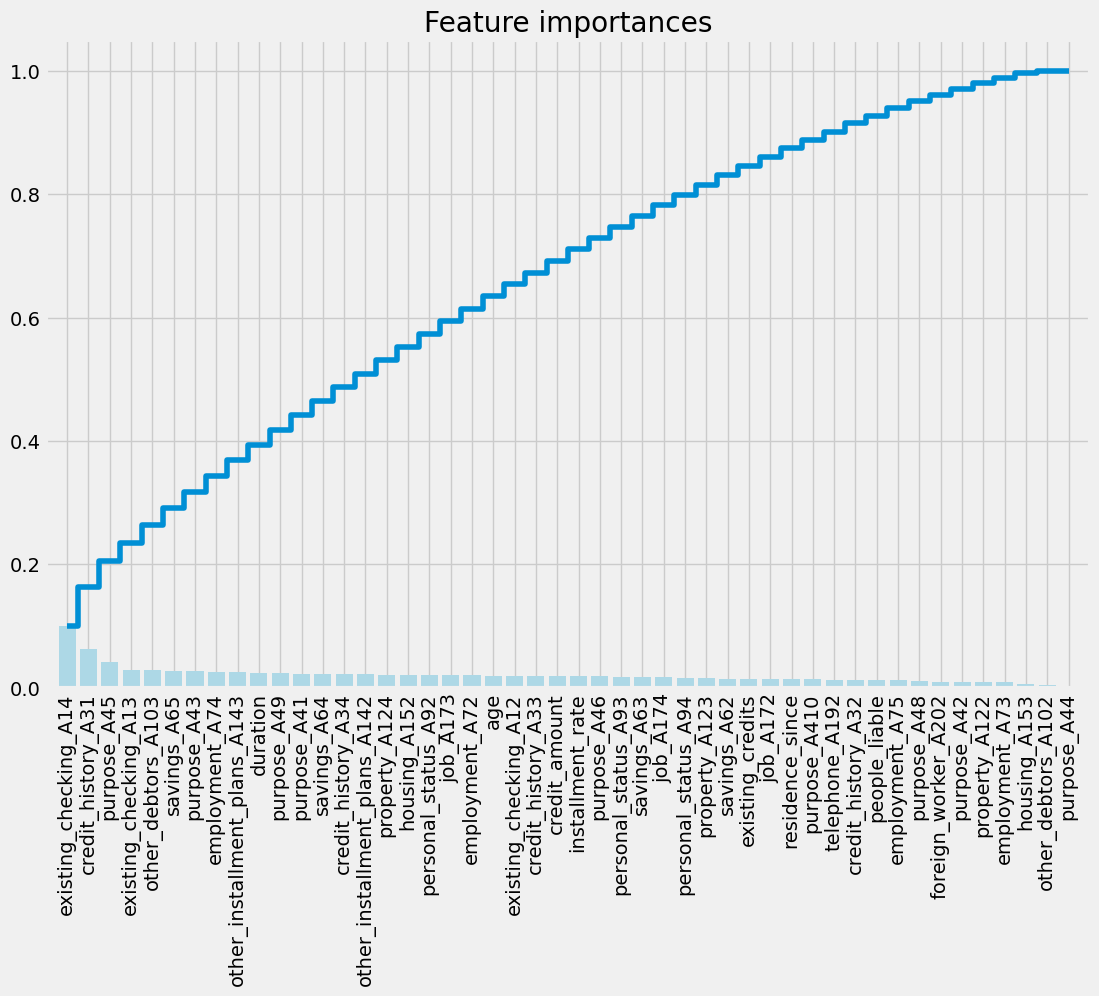

In [28]:
import xgboost as xgb

# Use XGBoost classifier
clf = xgb.XGBClassifier(n_estimators=100, random_state=123)
clf.fit(X_train_scaled, y_train)

# Get feature importances
importances = clf.feature_importances_
names = X_train.columns

# Call the plotting function
plot_feature_importance(importances, names)
